# **<center>Uber Exploratory Data Analysis </center>**

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

>This project analyzes an **Uber ride dataset** to explore patterns in **bookings, timings, payments, and ratings**.  
The goal is to identify key factors affecting **ride efficiency, customer satisfaction, and cancellation trends** through **Exploratory Data Analysis (EDA)**.  





In [225]:
df=pd.read_csv('UberDataset1.csv')
df

,Customer ID,Booking ID,Pickup Location,Drop Location,Booking Status,Vehicle Type,Date,Time,Ride Distance,Booking Value,...,Avg CTAT,Driver Ratings,Avg VTAT,Customer Rating,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason
0,C09761,B000001,IIT Delhi,Sohna Road,Completed,Go Mini,2024-01-24,18:39:14,20.20,272.37,...,4.32,3.60,3.02,3.53,NaN,NaN,NaN,NaN,NaN,NaN
1,C03455,B000002,Nawada,Noida Extension,Completed,eBike,2024-03-04,14:38:54,6.21,67.67,...,2.49,4.24,1.60,4.44,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown
2,C03791,B000003,Uttam Nagar,Mayur Vihar,Completed,Go Mini,2024-08-09,07:31:02,16.17,186.88,...,4.40,4.12,2.80,4.01,NaN,NaN,NaN,NaN,NaN,NaN
3,C04997,B000004,Ghitorni,Satguru Ram Singh Marg,Completed,Bike,2024-08-25,15:05:14,10.49,89.87,...,4.41,4.04,2.56,3.96,NaN,NaN,NaN,NaN,NaN,NaN
4,C03596,B000005,Rajiv Chowk,New Delhi Railway Station,Completed,Go Mini,2024-03-28,08:04:50,10.32,159.61,...,4.62,NaN,2.54,3.90,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,C06080,B149996,Udyog Vihar,Palam Vihar,Completed,Go Mini,2024-06-26,19:37:52,11.06,153.54,...,5.90,3.79,1.74,4.01,NaN,NaN,NaN,NaN,NaN,NaN
149996,C06306,B149997,Anand Vihar ISBT,Vishwavidyalaya,Completed,Bike,2024-04-05,07:21:39,7.15,68.67,...,3.56,4.01,3.26,3.75,NaN,NaN,NaN,NaN,NaN,NaN
149997,C08937,B149998,Mayur Vihar,Meerut,Cancelled by Customer,eBike,2024-06-04,04:24:33,12.48,99.63,...,9.63,2.84,5.21,1.87,NaN,NaN,NaN,NaN,NaN,NaN
149998,C03087,B149999,Azadpur,Noida Sector 62,Completed,Go Sedan,2024-05-04,12:04:49,17.41,204.38,...,4.86,NaN,2.99,4.42,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
df.columns

Index(['Customer ID', 'Booking ID', 'Pickup Location', 'Drop Location',
       'Booking Status', 'Vehicle Type', 'Date', 'Time', 'Ride Distance',
       'Booking Value', 'Payment Method', 'Avg CTAT', 'Driver Ratings',
       'Avg VTAT', 'Customer Rating', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason'],
      dtype='object')

In [227]:
df.shape

(150000, 21)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        150000 non-null  object 
 1   Booking ID                         150000 non-null  object 
 2   Pickup Location                    150000 non-null  object 
 3   Drop Location                      150000 non-null  object 
 4   Booking Status                     150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Date                               150000 non-null  object 
 7   Time                               150000 non-null  object 
 8   Ride Distance                      150000 non-null  float64
 9   Booking Value                      142564 non-null  float64
 10  Payment Method                     142500 non-null  object 
 11  Avg CTAT                           1500

In [229]:
df.describe()

,Ride Distance,Booking Value,Avg CTAT,Driver Ratings,Avg VTAT,Customer Rating,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides
count,150000.000000,142564.000000,150000.000000,142575.000000,142564.000000,150000.000000,10500.0,27000.0,9000.0
mean,8.725433,131.852532,4.746230,3.916989,3.545678,3.784936,1.0,1.0,1.0
std,9.358527,130.939397,2.145921,0.511307,2.848948,0.854073,0.0,0.0,0.0
min,0.200000,22.680000,0.200000,1.000000,0.100000,1.000000,1.0,1.0,1.0
25%,2.390000,52.887500,3.360000,3.620000,2.040000,3.340000,1.0,1.0,1.0
50%,5.790000,89.940000,4.100000,4.040000,2.660000,4.050000,1.0,1.0,1.0
75%,11.750000,159.440000,5.290000,4.280000,4.000000,4.390000,1.0,1.0,1.0
max,105.560000,1651.690000,16.980000,5.000000,31.760000,5.000000,1.0,1.0,1.0


## **Dataset overview**

- **Dataset Name:** Uber Riding Dataset  
- **Rows:** 150,000 ride records  
- **Columns:** 15 features per ride entry  
- **Key Features:**  
  - **Date & Time:** When the ride was booked  
  - **Booking value:** IDs and status for each booking/customer  
  - **Locations:** Pickup and Drop locations as text  
  - **Vehicle & Payment:** Vehicle type and payment method  
- **Ride Details:**  
  - **Avg VTAT & CTAT:** Average driver and customer times (numeric)  
  - **Booking Value & Ride Distance:** Amount paid and distance traveled  
- **Ratings:**  
  - **Driver Rating & Customer Rating:** Numeric scores for service (some missing values)  
- **Missing Data:**  
  - **Avg VTAT, CTAT, Booking Value, Ride Distance, Driver and Customer Ratings, Payment Method** have some missing entries  
- **Column Types:**  
  - 9 columns are text/object (e.g., IDs, status, location), 6 are numeric (float)  



## **Data Cleaning**
#### **Dropping Irrelevant Columns: 'booking id' and 'customer id'**

  In data analysis, it's important to remove columns that are not relevant to your analysis. For this dataset, we'll drop the **'booking id'** and **'customer id'** columns using :



In [230]:
df.drop(['Customer ID','Booking ID'],axis=1,inplace=True)

### **Handling Missing Values**

In [231]:
df.isnull().sum()

Pickup Location                           0
Drop Location                             0
Booking Status                            0
Vehicle Type                              0
Date                                      0
Time                                      0
Ride Distance                             0
Booking Value                          7436
Payment Method                         7500
Avg CTAT                                  0
Driver Ratings                         7425
Avg VTAT                               7436
Customer Rating                           0
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
dtype: int64

In [232]:

(df.isnull().sum()/len(df))*100


Pickup Location                       0.000000
Drop Location                         0.000000
Booking Status                        0.000000
Vehicle Type                          0.000000
Date                                  0.000000
Time                                  0.000000
Ride Distance                         0.000000
Booking Value                         4.957333
Payment Method                        5.000000
Avg CTAT                              0.000000
Driver Ratings                        4.950000
Avg VTAT                              4.957333
Customer Rating                       0.000000
Cancelled Rides by Customer          93.000000
Reason for cancelling by Customer    93.000000
Cancelled Rides by Driver            82.000000
Driver Cancellation Reason           82.000000
Incomplete Rides                     94.000000
Incomplete Rides Reason              94.000000
dtype: float64

#####  Dropping Columns due to High Missing Values (>80%)

The following columns have excessive missing values (82–94%) and were removed from the dataset 
as they provide little usable information and could introduce noise:

- **Cancelled Rides by Customer** – 93% missing  
- **Reason for Cancelling by Customer** – 93% missing  
- **Cancelled Rides by Driver** – 82% missing  
- **Driver Cancellation Reason** – 82% missing  
- **Incomplete Rides** – 94% missing  
- **Incomplete Rides Reason** – 94% missing  


In [233]:
df.drop(['Cancelled Rides by Customer','Reason for cancelling by Customer','Cancelled Rides by Driver','Driver Cancellation Reason','Incomplete Rides','Incomplete Rides Reason'], axis=1, inplace=True)

#### Imputing missing values

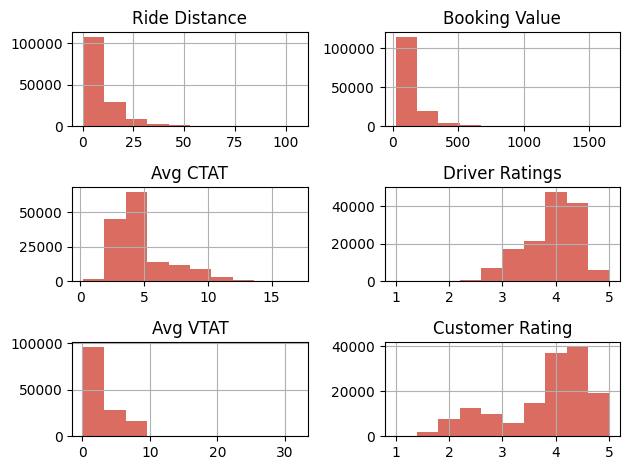

In [234]:
numeric=df.select_dtypes('number')

numeric.hist(color='#db6c61')
plt.tight_layout()
plt.show()

In [235]:
objects=df.select_dtypes('object')

for col in numeric:
    df[col]=df[col].fillna(df[col].median())

for col in objects:
    df[col]=df[col].fillna(df[col].mode()[0])

In [236]:
df.isnull().sum()

Pickup Location    0
Drop Location      0
Booking Status     0
Vehicle Type       0
Date               0
Time               0
Ride Distance      0
Booking Value      0
Payment Method     0
Avg CTAT           0
Driver Ratings     0
Avg VTAT           0
Customer Rating    0
dtype: int64

### **Handling Outliers**

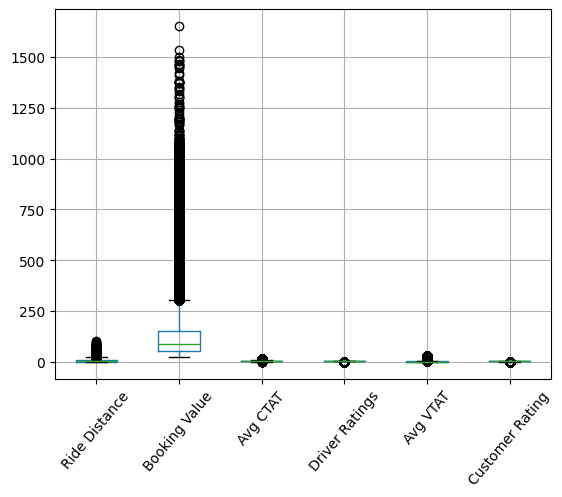

In [237]:
numeric=df.select_dtypes('number')

numeric.boxplot()
plt.xticks(rotation=50)
plt.show()

In [238]:
def outlier_detection(data):
    q1=np.percentile(data,25,method='midpoint')
    q3=np.percentile(data,75,method='midpoint')
    iqr=q3-q1

    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)

    outlier_condition=(data<lower) | (data>upper)
    outlier=data[outlier_condition]
    outlier_index=data[outlier_condition].index
    percentage=(len(outlier)/len(df))*100

    return outlier,outlier_index,percentage

In [239]:
outliers,indices,percent=outlier_detection(df['Ride Distance'])
print(outliers.head())
print(percent)

34    33.96
47    38.53
54    38.69
83    29.52
87    45.41
Name: Ride Distance, dtype: float64
5.592


I'm capping missing values whose percentage of missingness is greater than 5%, otherwise I will drop

In [240]:
lower=np.percentile(df['Ride Distance'],5,method='midpoint')
upper=np.percentile(df['Ride Distance'],95,method='midpoint')

df['Ride Distance']=df['Ride Distance'].clip(lower=lower,upper=upper)

In [241]:
outliers,indices,percent=outlier_detection(df['Booking Value'])
print(outliers.head())
print(percent)

25    433.93
34    404.52
47    451.37
83    426.09
85    349.32
Name: Booking Value, dtype: float64
7.331333333333332


In [242]:
lower=np.percentile(df['Booking Value'],5,method='midpoint')
upper=np.percentile(df['Booking Value'],95,method='midpoint')

df['Booking Value']=df['Booking Value'].clip(lower=lower,upper=upper)

In [243]:
outliers,indices,percent=outlier_detection(df['Avg CTAT'])
print(outliers.head())
print(percent)

6      8.59
10    10.32
22     8.50
33     8.85
55     9.34
Name: Avg CTAT, dtype: float64
10.327333333333332


In [244]:
lower=np.percentile(df['Avg CTAT'],5,method='midpoint')
upper=np.percentile(df['Avg CTAT'],95,method='midpoint')

df['Avg CTAT']=df['Avg CTAT'].clip(lower=lower,upper=upper)

In [245]:
outliers,indices,percent=outlier_detection(df['Driver Ratings'])
print(outliers.head())
print(percent)

96     2.67
152    2.59
294    2.50
417    2.73
482    2.50
Name: Driver Ratings, dtype: float64
2.024


In [246]:
df.drop(indices,inplace=True)

In [247]:
outliers,indices,percent=outlier_detection(df['Avg VTAT'])
print(outliers.head())
print(percent)

6     17.95
10     7.93
14     7.33
23     7.63
30     7.45
Name: Avg VTAT, dtype: float64
14.270161400070766


In [248]:
lower=np.percentile(df['Avg VTAT'],5,method='midpoint')
upper=np.percentile(df['Avg VTAT'],95,method='midpoint')

df['Avg VTAT']=df['Avg VTAT'].clip(lower=lower,upper=upper)

In [249]:
outliers,indices,percent=outlier_detection(df['Customer Rating'])
print(outliers.head())
print(percent)

10     1.49
33     1.95
62     1.90
68     1.91
101    2.02
Name: Customer Rating, dtype: float64
2.599276013173294


In [250]:
df.drop(indices,inplace=True)

In [251]:
df.head()

,Pickup Location,Drop Location,Booking Status,Vehicle Type,Date,Time,Ride Distance,Booking Value,Payment Method,Avg CTAT,Driver Ratings,Avg VTAT,Customer Rating
0,IIT Delhi,Sohna Road,Completed,Go Mini,2024-01-24,18:39:14,20.20,272.37,Debit Card,4.32,3.60,3.02,3.53
1,Nawada,Noida Extension,Completed,eBike,2024-03-04,14:38:54,6.21,67.67,Debit Card,2.49,4.24,1.60,4.44
2,Uttam Nagar,Mayur Vihar,Completed,Go Mini,2024-08-09,07:31:02,16.17,186.88,Uber Wallet,4.40,4.12,2.80,4.01
3,Ghitorni,Satguru Ram Singh Marg,Completed,Bike,2024-08-25,15:05:14,10.49,89.87,Cash,4.41,4.04,2.56,3.96
4,Rajiv Chowk,New Delhi Railway Station,Completed,Go Mini,2024-03-28,08:04:50,10.32,159.61,Uber Wallet,4.62,4.04,2.54,3.90


### **Feature Extraction**

We don't need the features **'Date'** and **'Time'** completely. I Want to extract or derive new feature such as **'Month'** and **'Hour'** from those existing features.


In [252]:
df['Date'].dtype

dtype('O')

In [253]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\4021367300.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [254]:
df['Month']=df['Date'].dt.month
df['Hour']=df['Time'].dt.hour

In [255]:
df['Month'].unique()

array([ 1,  3,  8,  2,  4,  5,  7, 11,  6, 10, 12,  9], dtype=int32)

In [256]:
df['Month']=df['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [257]:
df.drop(['Date','Time'],axis=1,inplace=True)

In [258]:
df=df.rename(columns={'Avg CTAT':'Avg Customer Arrival Time','Avg VTAT':'Avg Vehicle Arrival Time'})

In [259]:
df.columns

Index(['Pickup Location', 'Drop Location', 'Booking Status', 'Vehicle Type',
       'Ride Distance', 'Booking Value', 'Payment Method',
       'Avg Customer Arrival Time', 'Driver Ratings',
       'Avg Vehicle Arrival Time', 'Customer Rating', 'Month', 'Hour'],
      dtype='object')

In [260]:
df.head()

,Pickup Location,Drop Location,Booking Status,Vehicle Type,Ride Distance,Booking Value,Payment Method,Avg Customer Arrival Time,Driver Ratings,Avg Vehicle Arrival Time,Customer Rating,Month,Hour
0,IIT Delhi,Sohna Road,Completed,Go Mini,20.20,272.37,Debit Card,4.32,3.60,3.02,3.53,Jan,18
1,Nawada,Noida Extension,Completed,eBike,6.21,67.67,Debit Card,2.49,4.24,1.60,4.44,Mar,14
2,Uttam Nagar,Mayur Vihar,Completed,Go Mini,16.17,186.88,Uber Wallet,4.40,4.12,2.80,4.01,Aug,7
3,Ghitorni,Satguru Ram Singh Marg,Completed,Bike,10.49,89.87,Cash,4.41,4.04,2.56,3.96,Aug,15
4,Rajiv Chowk,New Delhi Railway Station,Completed,Go Mini,10.32,159.61,Uber Wallet,4.62,4.04,2.54,3.90,Mar,8


#### **Booking Status Distribution**

In [261]:
booking_distribution=df[(df['Booking Status']=='Cancelled by Customer') | (df['Booking Status']=='Cancelled by Driver') | (df['Booking Status']=='Completed')]
booking_distribution['Booking Status']=booking_distribution['Booking Status'].replace({'Cancelled by Customer':'Cancelled','Cancelled by Driver':'Cancelled'})
print(booking_distribution['Booking Status'].value_counts())

Booking Status
Completed    112288
Cancelled     17191
Name: count, dtype: int64


C:\Users\moham\AppData\Local\Temp\ipykernel_19512\1954514515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_distribution['Booking Status']=booking_distribution['Booking Status'].replace({'Cancelled by Customer':'Cancelled','Cancelled by Driver':'Cancelled'})


In [262]:
top_booking_distribution=booking_distribution['Booking Status'].value_counts()
label=top_booking_distribution.index
counts=top_booking_distribution.values


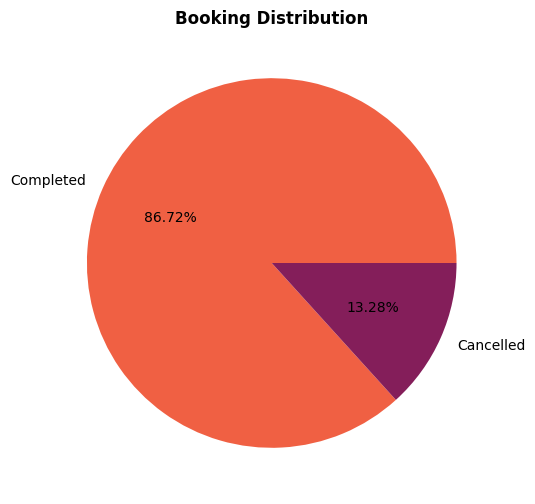

In [263]:
colors=sns.color_palette('rocket_r',len(counts))

plt.figure(figsize=(15,6))
plt.pie(counts,
        labels=label,
        autopct="%.2f%%",
        colors=colors)
plt.title('Booking Distribution', fontweight='bold')
plt.show()

#### **Insights**

- **Completed bookings make up **86.72%**, showing most rides finish successfully.**
- **Cancelled bookings account for **13.28%**, a smaller but notable share.**
- **Overall, the system shows high completion efficiency**.  
- **Cancellations still exist, suggesting room for operational improvement**.


C:\Users\moham\AppData\Local\Temp\ipykernel_19512\1733941463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Booking Status', y='Avg Vehicle Arrival Time', data=booking_distribution, estimator='mean',palette='rocket_r')


Text(0.5, 1.0, 'Average Vehicle Arrival Time vs Booking Status')

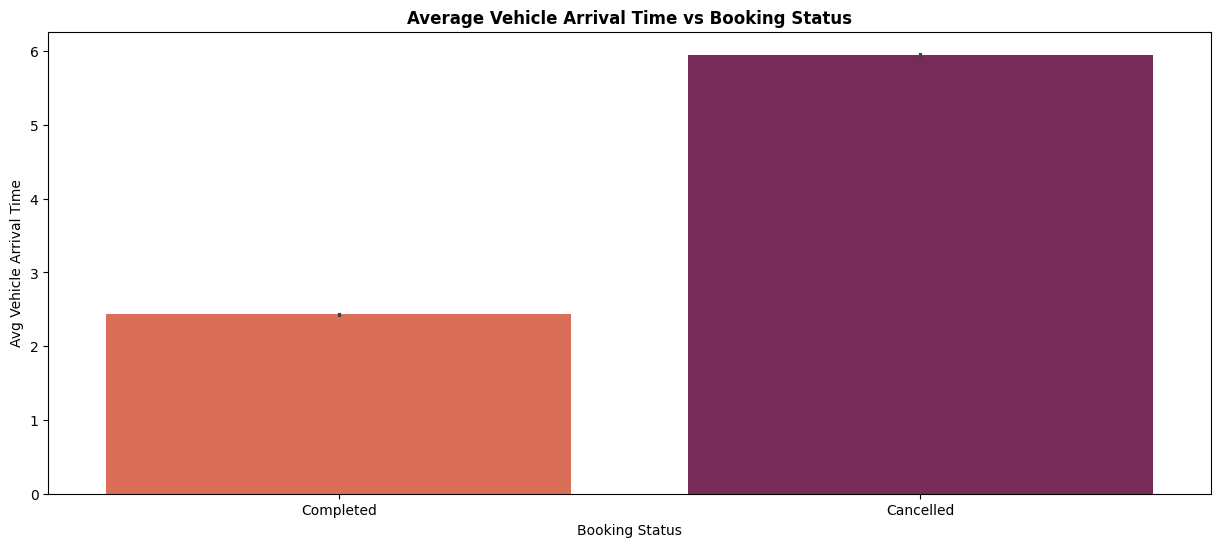

In [264]:
plt.figure(figsize=(15,6))
sns.barplot(x='Booking Status', y='Avg Vehicle Arrival Time', data=booking_distribution, estimator='mean',palette='rocket_r')
plt.title('Average Vehicle Arrival Time vs Booking Status',fontweight='bold')


#### **Insights**

- **Cancelled bookings have much higher vehicle arrival times.**
- **Completed bookings have quicker arrivals.**
- **Reducing arrival time may decrease cancellations.**



#### **Most Frequent Pickup and Drop Location**

In [265]:
top3=df['Pickup Location'].value_counts().nlargest(3).index
df_top3=df[df['Pickup Location'].isin(top3)]


C:\Users\moham\AppData\Local\Temp\ipykernel_19512\2451388950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pickup Location',data=df_top3,palette='rocket_r')


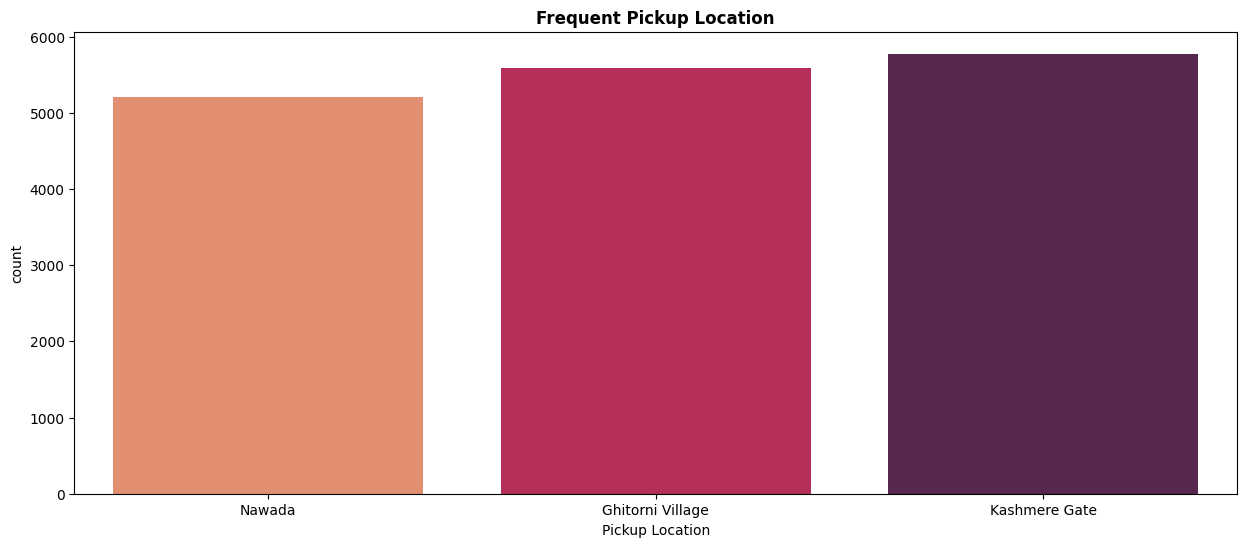

In [266]:
plt.figure(figsize=(15,6))
sns.countplot(x='Pickup Location',data=df_top3,palette='rocket_r')
plt.title('Frequent Pickup Location',fontweight='bold')
plt.show()

**Top pickup locations are Kashmiri Gate, Ghitorni Village, Nawada.**

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\3946484206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drop Location',data=df_top3,palette='rocket_r')


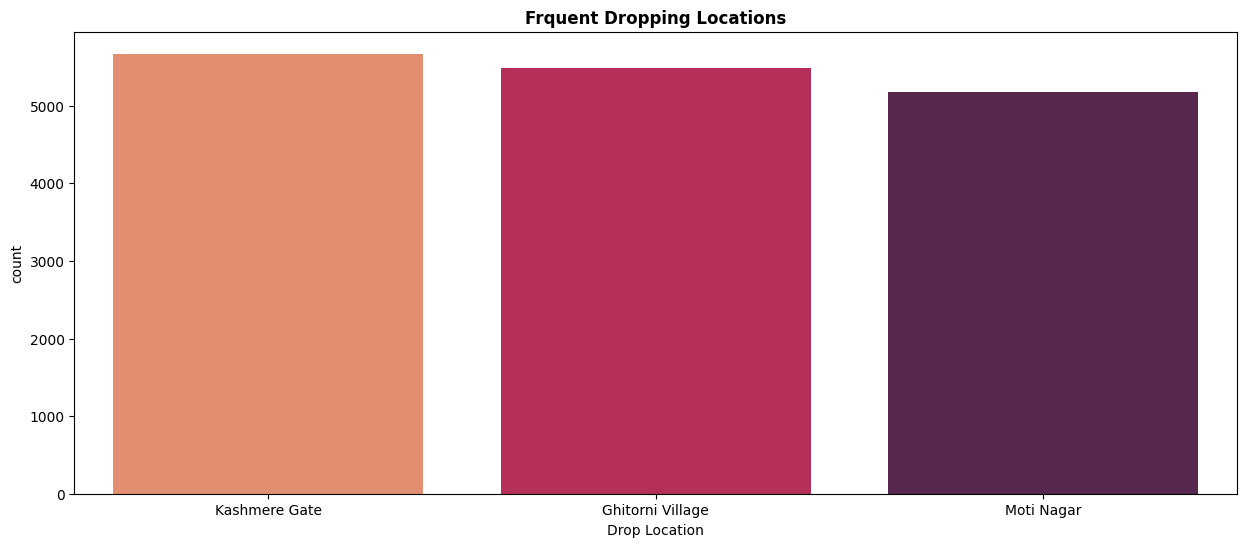

In [267]:
top3=df['Drop Location'].value_counts().nlargest(3).index
df_top3=df[df['Drop Location'].isin(top3)]

plt.figure(figsize=(15,6))
sns.countplot(x='Drop Location',data=df_top3,palette='rocket_r')
plt.title('Frquent Dropping Locations', fontweight='bold')
plt.show()

#### **Top Booked Vehicle Type**



C:\Users\moham\AppData\Local\Temp\ipykernel_19512\1293473473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle Type',data=df_top3,palette='rocket_r')


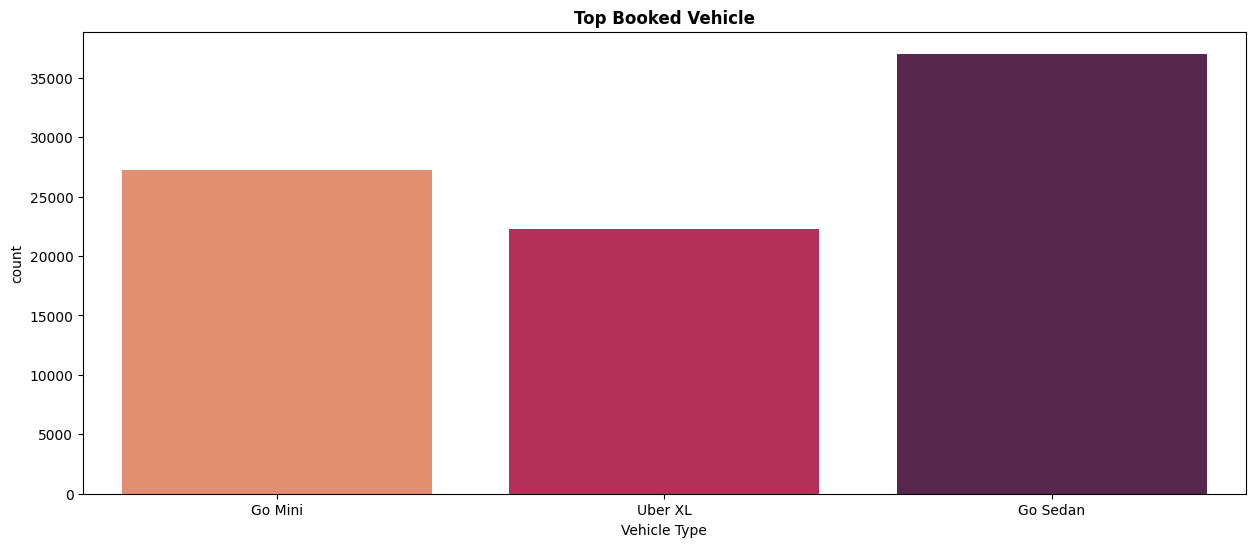

In [268]:
top3=df['Vehicle Type'].value_counts().nlargest(3).index
df_top3=df[df['Vehicle Type'].isin(top3)]

plt.figure(figsize=(15,6))
sns.countplot(x='Vehicle Type',data=df_top3,palette='rocket_r')
plt.title('Top Booked Vehicle',fontweight='bold')
plt.show()

#### **Insights**

- **Go Sedan has the highest number of bookings.**
- **Go Mini and Uber XL are also popular, but less than Go Sedan.**
- **Sedan-type vehicles are preferred by most users.**


#### **Top Booked Vehicle Type in Most Rushing Area**



In [269]:
top_pickup=df['Pickup Location'].value_counts().idxmax()
df_top_pickup=df[df['Pickup Location']==top_pickup]

In [270]:
top_vehicle=df_top_pickup['Vehicle Type'].value_counts().idxmax()
print("Most booked vehicle in",top_pickup,':',top_vehicle)

Most booked vehicle in Kashmere Gate : Go Sedan


**Most booked vehicle in Kashmere Gate : Go Sedan**

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\2212764303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle Type', data=df[df['Pickup Location']==top_pickup],palette='rocket_r')


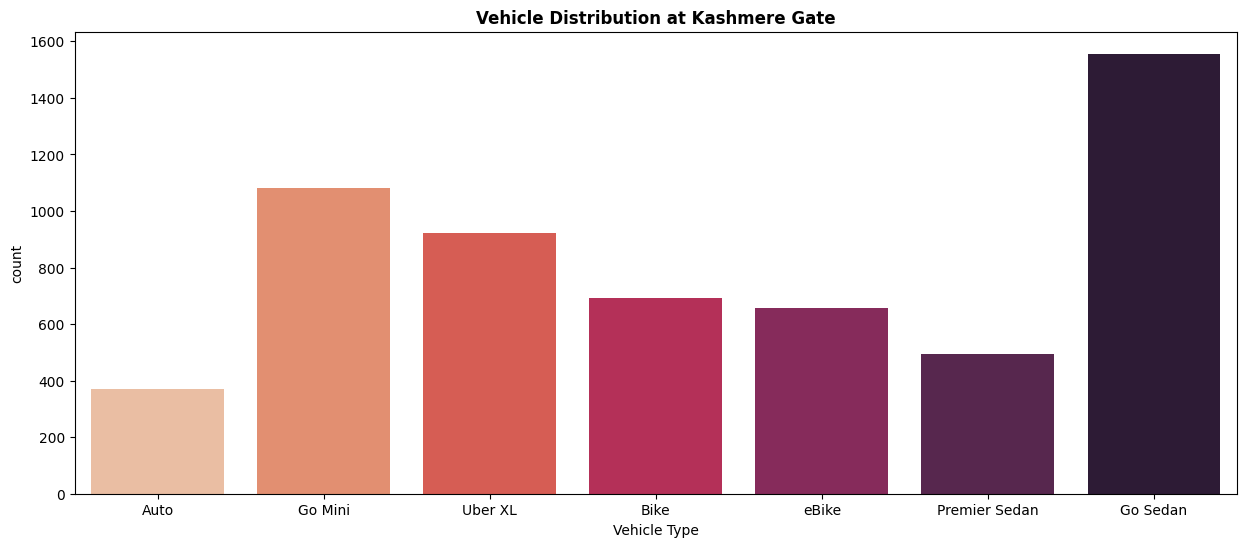

In [271]:
plt.figure(figsize=(15,6))
sns.countplot(x='Vehicle Type', data=df[df['Pickup Location']==top_pickup],palette='rocket_r')
plt.title(f"Vehicle Distribution at {top_pickup}",fontweight='bold')
plt.show()

#### **Insights**

- **Go Sedan and Go Mini are the most used vehicles at Kashmere Gate.**
- **Fewer bookings for economical options like Autos and bikes suggest daily commuters are less frequent here.**
- **Higher preference for larger or premium vehicles indicates that long-distance or occasional travelers are the main users at this hub.**



#### **Ride Distance vs Booking Value**

Text(0.5, 1.0, 'Ride Distance vs Booking Value')

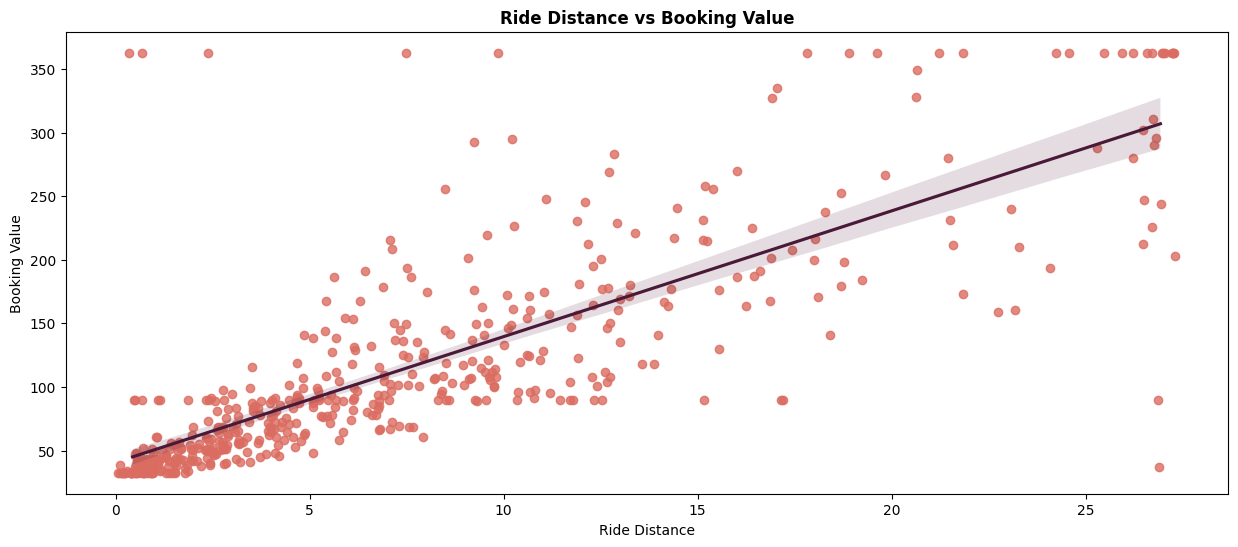

In [272]:
plt.figure(figsize=(15,6))
sns.regplot(x='Ride Distance',
            y='Booking Value',
            data=df.sample(n=500,random_state=1),
            x_jitter=0.5,
            line_kws={'color':'#4a1937'},
            scatter_kws={'color':'#db6c61'})
plt.title('Ride Distance vs Booking Value',fontweight='bold')


#### **Insights**

- **Booking value increases with ride distance.**
- **Most rides are short and low value.**
- **Some rides are outliers in value or distance.**




#### **Booking Trends by Hour**

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\3493209128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour',data=df,palette='rocket_r')


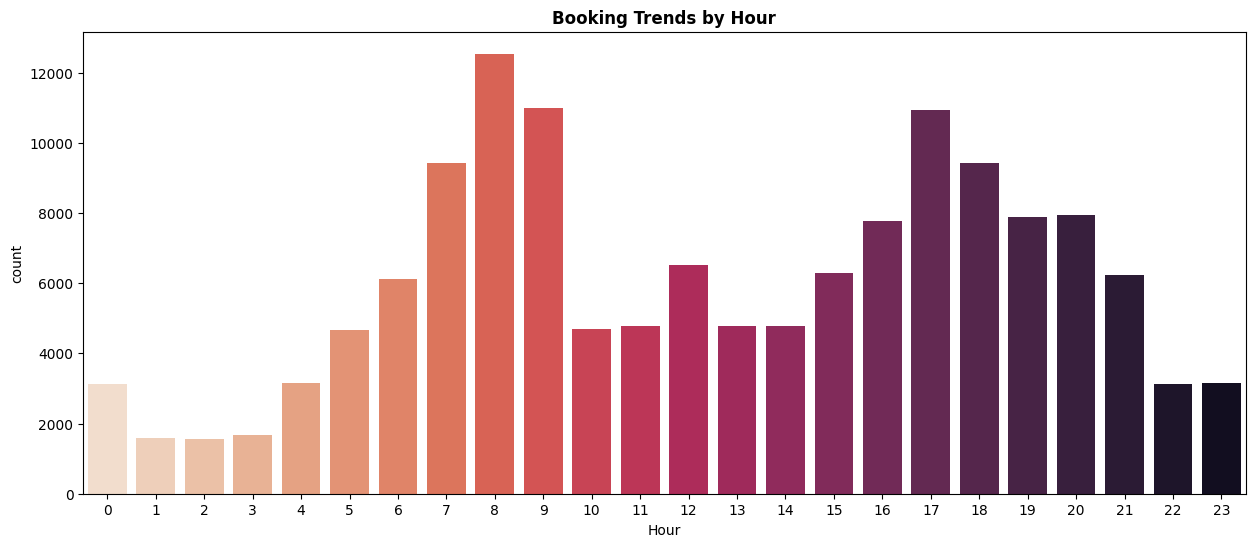

In [273]:
plt.figure(figsize=(15,6))
sns.countplot(x='Hour',data=df,palette='rocket_r')
plt.title('Booking Trends by Hour',fontweight='bold')
plt.show()

#### **Insights**

- **Peak booking hours are between **8 AM to 9 AM** indicating morning commute demand.**
- **A second surge appears around **5 PM to 8 PM**, showing evening return trips.**
- **Bookings remain low during midday **(11 AM to 3 PM)**.** 
- **Very few bookings occur **after 10 PM**, reflecting low night-time activity.**



#### **Payment Method Distribution & Its Relation to Booking Value**

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\151298282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method',data=df,palette='rocket_r')


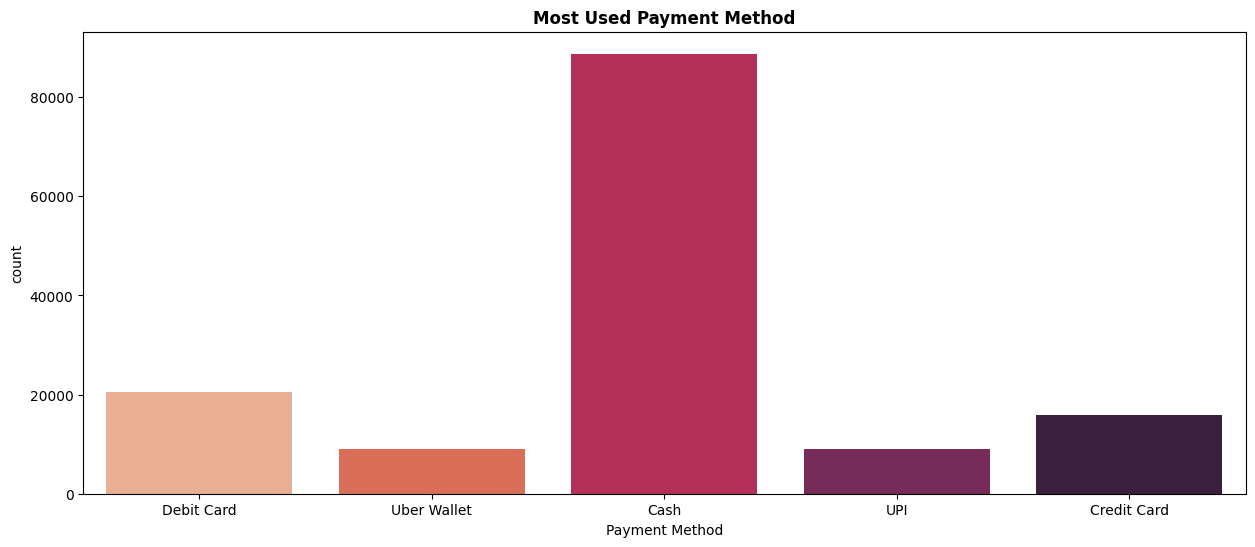

In [274]:
plt.figure(figsize=(15,6))
sns.countplot(x='Payment Method',data=df,palette='rocket_r')
plt.title('Most Used Payment Method',fontweight='bold')
plt.show()

#### **Insights**

- **Cash is by far the most frequently used payment method, much higher than any digital method, showing a strong continued preference for cash.**

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\3460663941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method',y='Booking Value',data=df,palette='rocket_r')


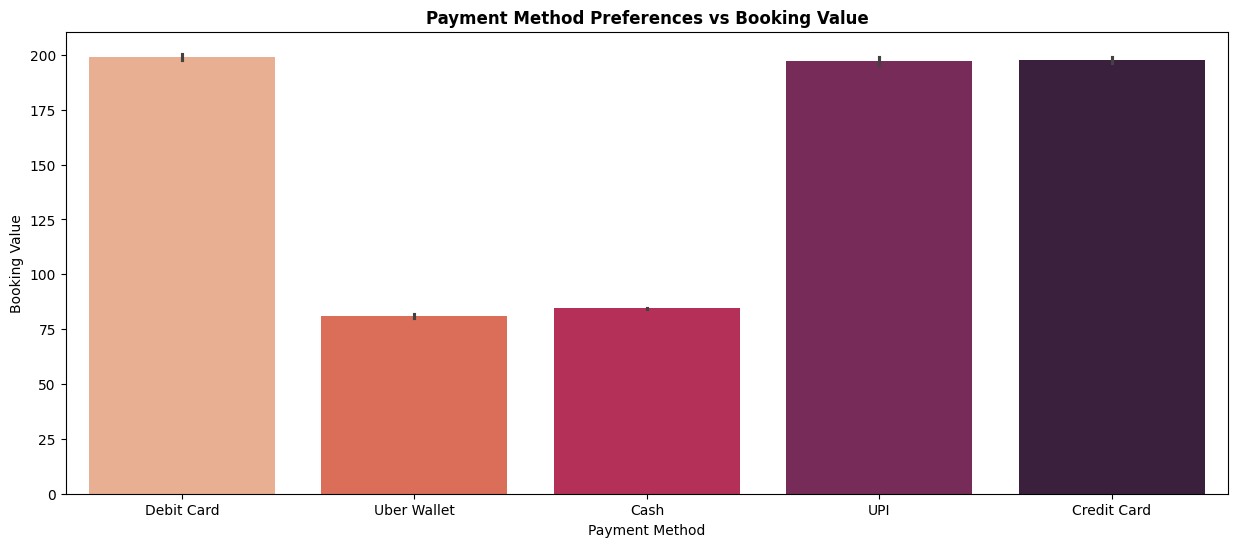

In [275]:
plt.figure(figsize=(15,6))
sns.barplot(x='Payment Method',y='Booking Value',data=df,palette='rocket_r')
plt.title('Payment Method Preferences vs Booking Value',fontweight='bold')
plt.show()

#### **Insights**

- **Customer payment behavior shows a clear trend: users tend to pay with cards or UPI for expensive rides, which aligns with modern urban payment preferences.**

#### **Vehicle Type vs Customer Rating**

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\1576943381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle Type', y='Customer Rating', data=df,palette='rocket_r')


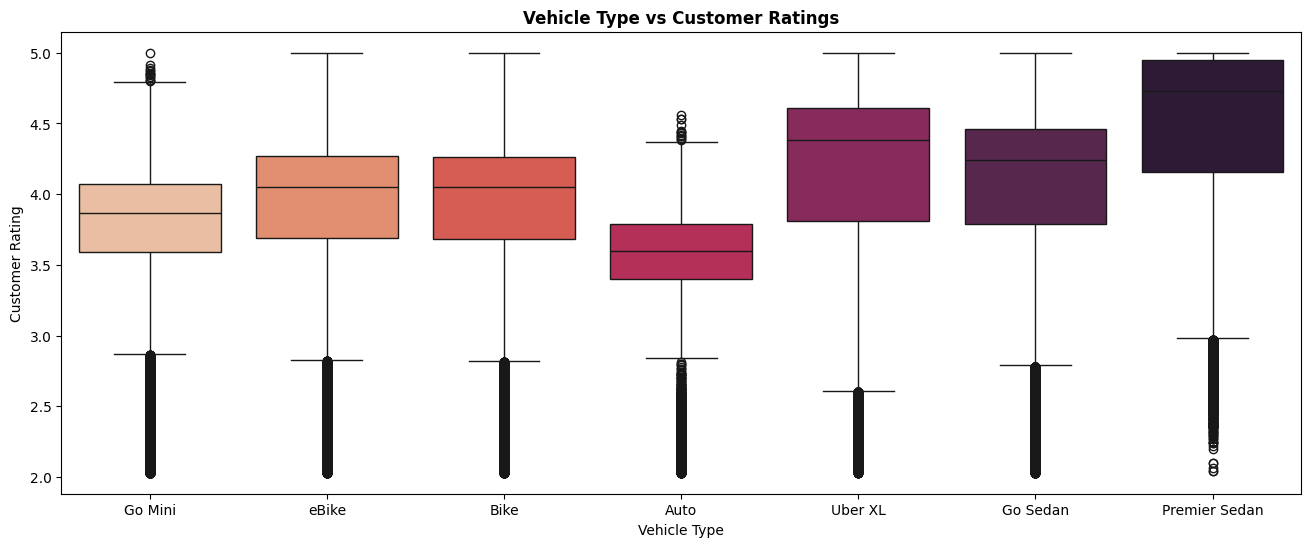

In [276]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Vehicle Type', y='Customer Rating', data=df,palette='rocket_r')
plt.title('Vehicle Type vs Customer Ratings',fontweight='bold')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_19512\3431168422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle Type',


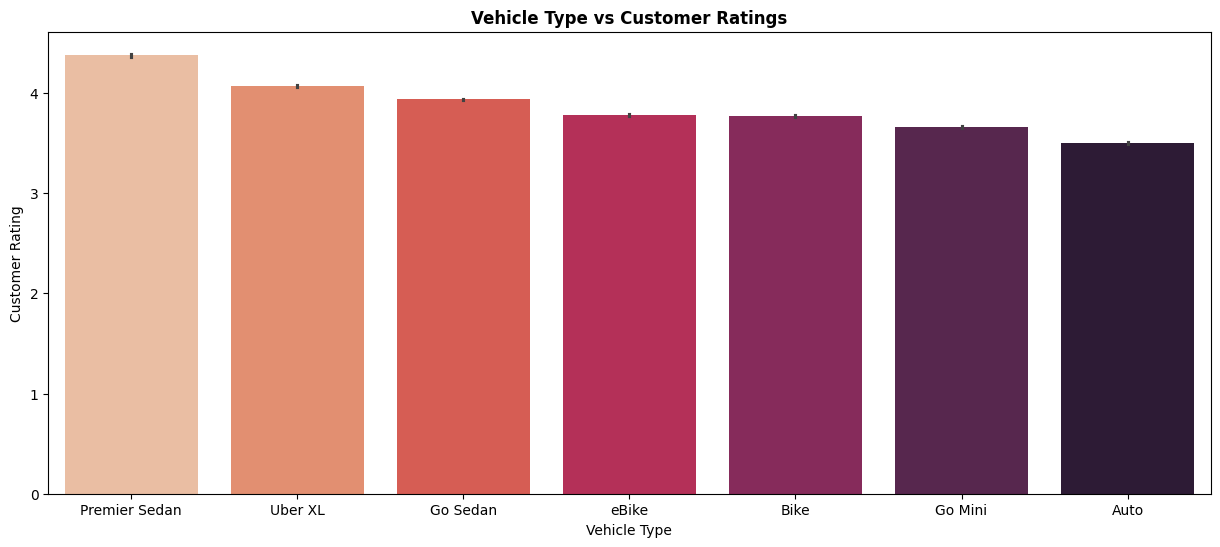

In [277]:

plt.figure(figsize=(15,6))
sns.barplot(x='Vehicle Type',
            y='Customer Rating',
            estimator='mean',
            data=df,
            palette='rocket_r',
            order=df.groupby('Vehicle Type')['Customer Rating'].mean().sort_values(ascending=False).index,
            )

plt.title('Vehicle Type vs Customer Ratings',fontweight='bold')
plt.show()

#### **Insights**

- **Customer satisfaction increases with vehicle quality and comfort.**
- **Premium vehicles like Premier Sedan deliver better service experience and fewer low ratings,
while Auto rides face more inconsistency and complaints.**

#### **Avg Vehicle Arrival Times vs Ratings**

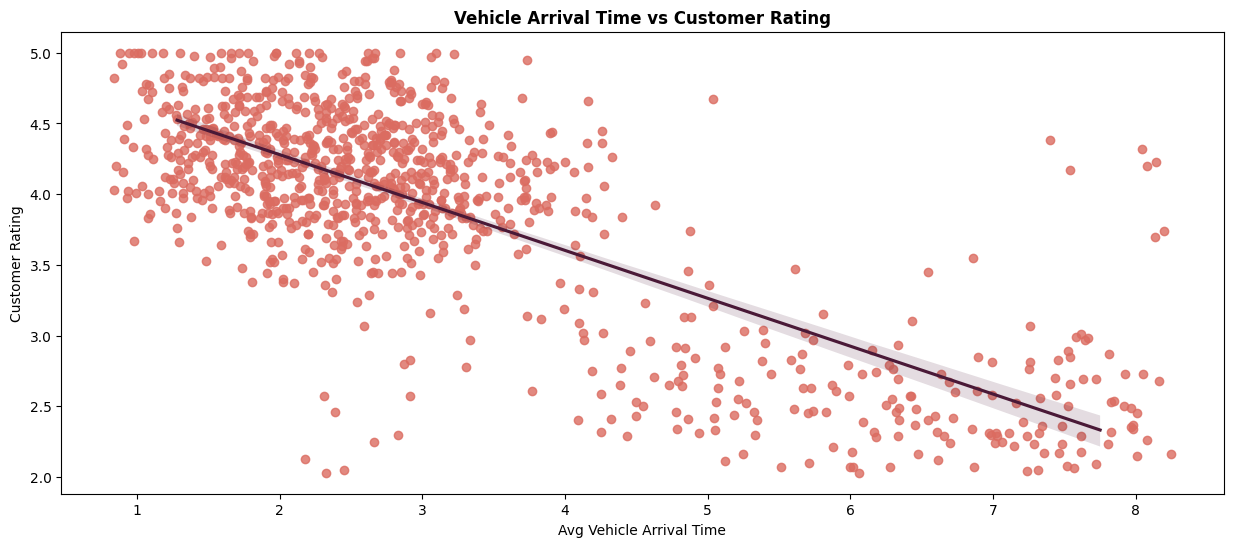

In [278]:
plt.figure(figsize=(15,6))
sns.regplot(x='Avg Vehicle Arrival Time',
                y='Customer Rating',
                data=df.sample(n=1000,random_state=1),
                x_jitter=0.5,
                line_kws={'color':'#4a1937'},
                scatter_kws={'color':'#db6c61'})
plt.title('Vehicle Arrival Time vs Customer Rating',fontweight='bold')
plt.show()

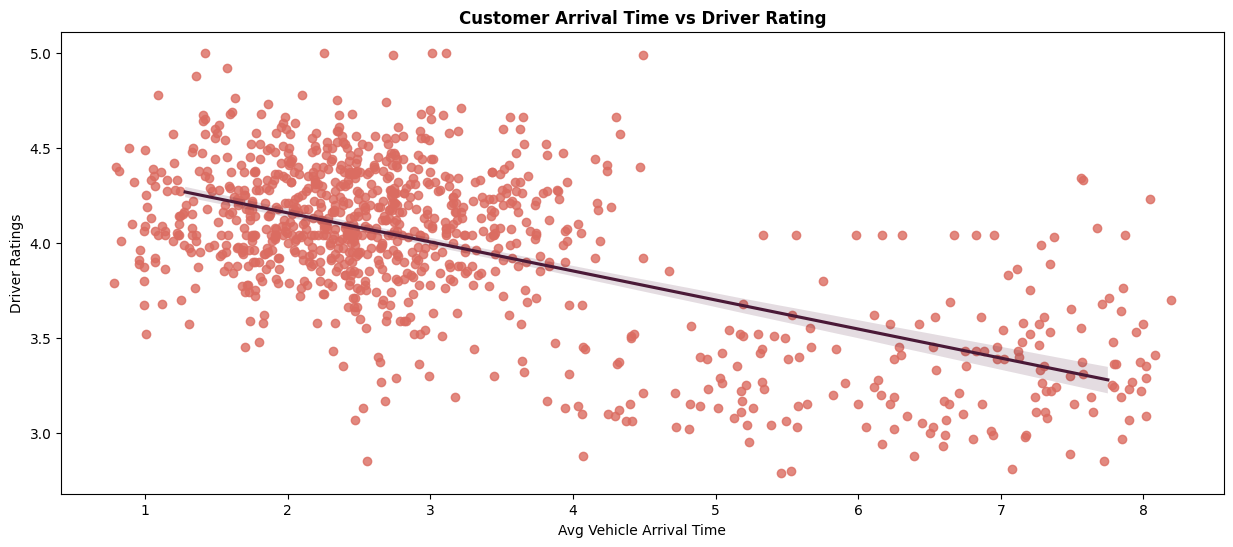

In [279]:
plt.figure(figsize=(15,6))
sns.regplot(x='Avg Vehicle Arrival Time',
                y='Driver Ratings',
                data=df.sample(n=1000,random_state=1),
                x_jitter=0.5,
                line_kws={'color':'#4a1937'},
                scatter_kws={'color':'#db6c61'})
plt.title('Customer Arrival Time vs Driver Rating',fontweight='bold')
plt.show()

#### **Insights**

- **The ratings are time-sensitive — even small increases in waiting time significantly reduce satisfaction.**

- **Fast response and timely pickups play a major role in perceived service quality**

#### **Cancellation Patterns**

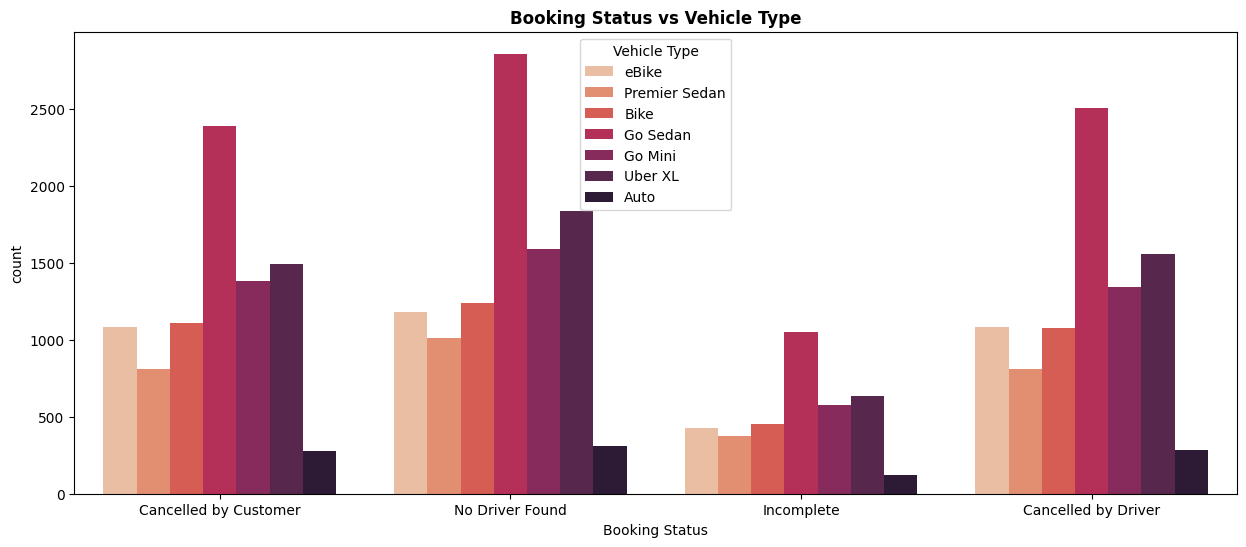

In [280]:
plt.figure(figsize=(15,6))
cancel_data=df[df['Booking Status']!='Completed']
sns.countplot(x='Booking Status',hue='Vehicle Type',data=cancel_data,palette='rocket_r')
plt.title('Booking Status vs Vehicle Type',fontweight='bold')
plt.show()

#### **Insights**

- ****Go Sedan** shows the highest cancellations, indicating heavy usage and booking failures.**
- ****Auto** has the fewest bookings, likely due to low demand or availability.** 
- ****Premier Sedan** and **Uber XL** face fewer cancellations, showing better reliability.**
- ****Go Sedan** and **Go Mini** dominate “No Driver Found” and “Incomplete” cases, hinting at driver shortages.**


### **Encoding**

In [281]:
object_data=df.select_dtypes('object')

for i in object_data:
    print("Unique values in",i,":",object_data[i].value_counts().head(4).index.to_list(),object_data[i].nunique())
    

Unique values in Pickup Location : ['Kashmere Gate', 'Ghitorni Village', 'Nawada', 'Moti Nagar'] 119
Unique values in Drop Location : ['Kashmere Gate', 'Ghitorni Village', 'Moti Nagar', 'Nawada'] 119
Unique values in Booking Status : ['Completed', 'No Driver Found', 'Cancelled by Driver', 'Cancelled by Customer'] 5
Unique values in Vehicle Type : ['Go Sedan', 'Go Mini', 'Uber XL', 'Bike'] 7
Unique values in Payment Method : ['Cash', 'Debit Card', 'Credit Card', 'UPI'] 5
Unique values in Month : ['Apr', 'May', 'Sep', 'Mar'] 12


#### **Encoding Plan for Categorical Features**

| Feature Name     | Encoding Type        | Reason for Selection |
|------------------|----------------------|----------------------|
| Pickup Location  | **Frequency Encoding** | High cardinality — reduces dimensionality while preserving frequency info. |
| Drop Location    | **Frequency Encoding** | Many categories — one-hot would create too many columns. |
| Booking Status   | **One-Hot Encoding**   | Few categories — binary representation fits well. |
| Vehicle Type     | **One-Hot Encoding**   | Low cardinality — safe to expand into dummy variables. |
| Payment Method   | **One-Hot Encoding**   | Categorical with few options — ideal for models. |
| Month            | **One-Hot Encoding**   | Non-ordinal feature — one-hot prevents false numerical relationships. |


In [282]:
freq=df['Pickup Location'].value_counts()
df['Pickup Location']=df['Pickup Location'].map(freq)

In [283]:
freq=df['Drop Location'].value_counts()
df['Drop Location']=df['Drop Location'].map(freq)

In [284]:
for i in ['Booking Status','Vehicle Type', 'Payment Method','Month']:
    df1=pd.get_dummies(df[i]).astype(int)
    df=pd.concat([df,df1],axis=1)
    df.drop(i,axis=1,inplace=True)

## 

In [285]:
df.columns

Index(['Pickup Location', 'Drop Location', 'Ride Distance', 'Booking Value',
       'Avg Customer Arrival Time', 'Driver Ratings',
       'Avg Vehicle Arrival Time', 'Customer Rating', 'Hour',
       'Cancelled by Customer', 'Cancelled by Driver', 'Completed',
       'Incomplete', 'No Driver Found', 'Auto', 'Bike', 'Go Mini', 'Go Sedan',
       'Premier Sedan', 'Uber XL', 'eBike', 'Cash', 'Credit Card',
       'Debit Card', 'UPI', 'Uber Wallet', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [286]:
df.head()

,Pickup Location,Drop Location,Ride Distance,Booking Value,Avg Customer Arrival Time,Driver Ratings,Avg Vehicle Arrival Time,Customer Rating,Hour,Cancelled by Customer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,763,752,20.20,272.37,4.32,3.60,3.02,3.53,18,0,...,0,0,1,0,0,0,0,0,0,0
1,5202,807,6.21,67.67,2.49,4.24,1.60,4.44,14,0,...,0,0,0,0,0,1,0,0,0,0
2,3716,798,16.17,186.88,4.40,4.12,2.80,4.01,7,0,...,0,0,0,0,0,0,0,0,0,0
3,778,785,10.49,89.87,4.41,4.04,2.56,3.96,15,0,...,0,0,0,0,0,0,0,0,0,0
4,4733,754,10.32,159.61,4.62,4.04,2.54,3.90,8,0,...,0,0,0,0,0,1,0,0,0,0


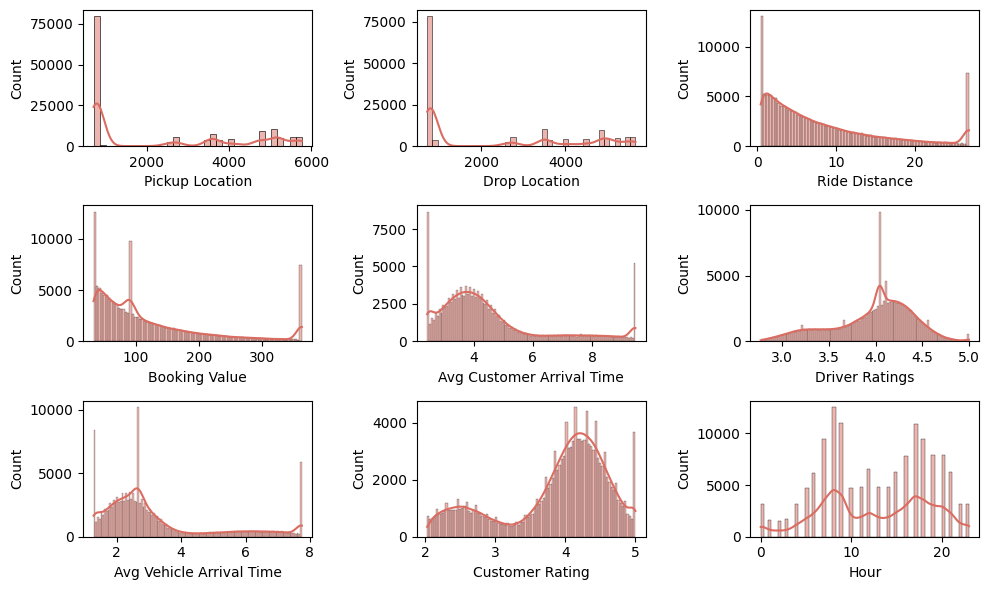

In [287]:
fig,axes=plt.subplots(3,3, figsize=(10,6))

sns.histplot(df['Pickup Location'],kde=True,ax=axes[0,0],color='#db6c61')
sns.histplot(df['Drop Location'],kde=True,ax=axes[0,1],color='#db6c61')
sns.histplot(df['Ride Distance'],kde=True,ax=axes[0,2],color='#db6c61')
sns.histplot(df['Booking Value'],kde=True,ax=axes[1,0],color='#db6c61')
sns.histplot(df['Avg Customer Arrival Time'],kde=True,ax=axes[1,1],color='#db6c61')
sns.histplot(df['Driver Ratings'],kde=True,ax=axes[1,2],color='#db6c61')
sns.histplot(df['Avg Vehicle Arrival Time'],kde=True,ax=axes[2,0],color='#db6c61')
sns.histplot(df['Customer Rating'],kde=True,ax=axes[2,1],color='#db6c61')
sns.histplot(df['Hour'],kde=True,ax=axes[2,2],color='#db6c61')
plt.tight_layout()

**There is no normally distributed features in our dataset. Therefore I'm normalizing all of them.**

In [288]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df[['Pickup Location', 'Drop Location', 'Ride Distance', 'Booking Value','Avg Customer Arrival Time', 'Driver Ratings','Avg Vehicle Arrival Time', 'Customer Rating', 'Hour']]=scaler.fit_transform(df[['Pickup Location', 'Drop Location', 'Ride Distance', 'Booking Value',
                                                                                                                                                                                                           'Avg Customer Arrival Time', 'Driver Ratings',
                                                                                                                                                                                                           'Avg Vehicle Arrival Time', 'Customer Rating', 'Hour']])

In [289]:
df.head()

,Pickup Location,Drop Location,Ride Distance,Booking Value,Avg Customer Arrival Time,Driver Ratings,Avg Vehicle Arrival Time,Customer Rating,Hour,Cancelled by Customer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0.012805,0.009067,0.746038,0.726336,0.268848,0.372197,0.268934,0.505051,0.782609,0,...,0,0,1,0,0,0,0,0,0,0
1,0.887313,0.020149,0.218113,0.106212,0.008535,0.659193,0.049459,0.811448,0.608696,0,...,0,0,0,0,0,1,0,0,0,0
2,0.594563,0.018336,0.593962,0.467350,0.280228,0.605381,0.234930,0.666667,0.304348,0,...,0,0,0,0,0,0,0,0,0,0
3,0.015760,0.015716,0.379623,0.173465,0.281650,0.569507,0.197836,0.649832,0.652174,0,...,0,0,0,0,0,0,0,0,0,0
4,0.794917,0.009470,0.373208,0.384738,0.311522,0.569507,0.194745,0.629630,0.347826,0,...,0,0,0,0,0,1,0,0,0,0


### **Conclusion**

#### **Final Summary — Uber Ride EDA Project**

- **Most rides (86%) were completed**, showing strong overall efficiency.  
- **Cancellations** are mainly caused by **longer vehicle arrival times** and driver shortages.  
- **Peak demand** appears during **morning (8–9 AM)** and **evening (5–8 PM)** hours.  
- **Premium vehicles** get **higher ratings**, while **long wait times** lower customer satisfaction.  
